---
title: "Preprocessing UKBB data"
author: "Saikat Banerjee"
format:
  html: default
date: "2023-10-30"
file-modified: "2023-10-30"
abstract: "Preprocessing steps for UKBB data from Neale Lab"

---

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as sc_stats
import collections
import pickle

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

In [19]:
phenotype_metafile = "/gpfs/commons/home/sbanerjee/work/npd/UKBB/npd_phenotypes.tsv"
variants_metafile = "/gpfs/commons/home/sbanerjee/work/npd/UKBB/metadata/significant_variants.tsv"
data_dir = "/gpfs/commons/home/sbanerjee/npddata/ukbb.imputed_v3.neale/3_all_assoc"

In [3]:
phenotype_df = pd.read_csv(phenotype_metafile, sep = '\t')
phenotype_ids = phenotype_df['phenotype'].to_list()
assoc_file = {}
for s in phenotype_ids:
    assoc_file[s] = f"{data_dir}/{s}.tsv"

In [20]:
phenotype_df

,phenotype,description,variable_type,source,n_non_missing,n_missing,n_controls,n_cases,PHESANT_transformation,notes
0,1160,Sleep duration,ordinal,phesant,359020,2174,NaN,NaN,1160_0|| INTEGER || reassignments: -1=NA|-3=NA...,"ACE touchscreen question ""About how many hours..."
1,1200,Sleeplessness / insomnia,ordinal,phesant,360738,456,NaN,NaN,1200_0|| CAT-SINGLE || Inc(>=10): 3(102157) ||...,"ACE touchscreen question ""Do you have trouble ..."
2,1220,Daytime dozing / sleeping (narcolepsy),ordinal,phesant,359752,1442,NaN,NaN,1220_0|| CAT-SINGLE || reassignments: 3=2 || I...,"ACE touchscreen question ""How likely are you t..."
3,1920,Mood swings,binary,phesant,352604,8590,193622.0,158982.0,1920_0|| CAT-SINGLE || Inc(>=10): 0(193622) ||...,"ACE touchscreen question ""Does your mood often..."
4,1970,Nervous feelings,binary,phesant,351829,9365,268709.0,83120.0,1970_0|| CAT-SINGLE || Inc(>=10): 0(268709) ||...,"ACE touchscreen question ""Would you call yours..."
...,...,...,...,...,...,...,...,...,...,...
312,T79,Diagnoses - main ICD10: T79 Certain early comp...,binary,icd10,361194,0,360989.0,205.0,NaN,NaN
313,TRAUMBRAIN_NONCONCUS,"severe traumatic brain injury, does not includ...",binary,finngen,361194,0,360631.0,563.0,NaN,NaN
314,VI_NERVOUS,Diseases of the nervous system,binary,finngen,361194,0,339871.0,21323.0,NaN,NaN
315,V_MENTAL_BEHAV,Mental and behavioural disorders,binary,finngen,361194,0,356892.0,4302.0,NaN,NaN


In [4]:
assoc_file['1160']

'/gpfs/commons/home/sbanerjee/npddata/ukbb.imputed_v3.neale/3_all_assoc/1160.tsv'

In [5]:
pd.read_csv(assoc_file['1160'], sep='\t', header = None, names = ['variant', 'low_confidence', 'beta', 'se', 'tstat', 'pval'])

,variant,low_confidence,beta,se,tstat,pval
0,1:2073742:A:T,False,-0.002622,0.007306,-0.358873,0.719690
1,1:2094006:A:G,False,-0.001466,0.007288,-0.201181,0.840557
2,1:2094007:C:G,False,-0.002688,0.007319,-0.367227,0.713450
3,1:2108792:C:T,False,-0.002112,0.007679,-0.274978,0.783333
4,1:2111080:C:T,False,-0.000891,0.007655,-0.116456,0.907291
...,...,...,...,...,...,...
41988,22:41812084:G:A,False,0.006255,0.002175,2.875620,0.004033
41989,22:41812439:A:G,False,0.006235,0.002175,2.866260,0.004154
41990,22:41812755:C:T,False,0.006234,0.002175,2.865640,0.004162
41991,22:41812819:T:C,False,0.006261,0.002175,2.878240,0.003999


In [11]:
assoc = {}

colnames = ['variant', 'low_confidence', 'beta', 'se', 'tstat', 'pval']

for pid in phenotype_ids:
    print (f"Read summary statistics for {pid}")
    assoc[pid] = pd.read_csv(assoc_file[pid], sep = '\t', names = colnames)
    assoc[pid]['phenotype_id'] = pid

Read summary statistics for 1160
Read summary statistics for 1200
Read summary statistics for 1220
Read summary statistics for 1920
Read summary statistics for 1970
Read summary statistics for 1980
Read summary statistics for 20002_1123
Read summary statistics for 20002_1240
Read summary statistics for 20002_1243
Read summary statistics for 20002_1246
Read summary statistics for 20002_1249
Read summary statistics for 20002_1250
Read summary statistics for 20002_1251
Read summary statistics for 20002_1254
Read summary statistics for 20002_1255
Read summary statistics for 20002_1256
Read summary statistics for 20002_1257
Read summary statistics for 20002_1258
Read summary statistics for 20002_1261
Read summary statistics for 20002_1262
Read summary statistics for 20002_1264
Read summary statistics for 20002_1265
Read summary statistics for 20002_1267
Read summary statistics for 20002_1279
Read summary statistics for 20002_1286
Read summary statistics for 20002_1287
Read summary statistic

In [14]:
assoc_df = pd.concat([v for k,v in assoc.items()])
assoc_df.to_pickle("../data/ukbb_assoc.pkl")
assoc_df

,variant,low_confidence,beta,se,tstat,pval,phenotype_id
0,1:2073742:A:T,False,-0.002622,0.007306,-0.358873,0.719690,1160
1,1:2094006:A:G,False,-0.001466,0.007288,-0.201181,0.840557,1160
2,1:2094007:C:G,False,-0.002688,0.007319,-0.367227,0.713450,1160
3,1:2108792:C:T,False,-0.002112,0.007679,-0.274978,0.783333,1160
4,1:2111080:C:T,False,-0.000891,0.007655,-0.116456,0.907291,1160
...,...,...,...,...,...,...,...
41988,22:41812084:G:A,False,-0.000076,0.000177,-0.431360,0.666207,Z43
41989,22:41812439:A:G,False,-0.000076,0.000177,-0.431209,0.666317,Z43
41990,22:41812755:C:T,False,-0.000076,0.000177,-0.428950,0.667960,Z43
41991,22:41812819:T:C,False,-0.000076,0.000177,-0.431143,0.666365,Z43


In [15]:
assoc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13311781 entries, 0 to 41992
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   variant         object 
 1   low_confidence  bool   
 2   beta            float64
 3   se              float64
 4   tstat           float64
 5   pval            float64
 6   phenotype_id    object 
dtypes: bool(1), float64(4), object(2)
memory usage: 723.6+ MB


In [17]:
print (f"Number of unique SNPs: {len(assoc_df['variant'].unique())}")
print (f"Number of unique studies: {len(assoc_df['phenotype_id'].unique())}")

Number of unique SNPs: 41993
Number of unique studies: 317


# Filter SNPs (indel, rare, low info)

In [55]:
variant_colnames = ['variant', 'chr', 'pos', 'ref', 'alt', 'rsid', 'varid', 
                    'consequence', 'consequence_category', 'info', 'call_rate',
                    'AC', 'AF', 'minor_allele', 'minor_AF', 'p_hwe', 
                    'n_called', 'n_not_called', 'n_hom_ref', 'n_het', 'n_hom_var', 'n_non_ref',
                    'r_heterozygosity', 'r_het_hom_var', 'r_expected_het_frequency']
variant_df = pd.read_csv(variants_metafile, sep = '\t', names = variant_colnames)

In [56]:
variant_df

,variant,chr,pos,ref,alt,rsid,varid,consequence,consequence_category,info,...,p_hwe,n_called,n_not_called,n_hom_ref,n_het,n_hom_var,n_non_ref,r_heterozygosity,r_het_hom_var,r_expected_het_frequency
0,1:2073742:A:T,1,2073742,A,T,rs551766141,1:2073742_A_T,non_coding_transcript_exon_variant,non_coding,0.992179,...,0.604866,361194,0,350078,11025,91,11116,0.030524,121.154000,0.030546
1,1:2094006:A:G,1,2094006,A,G,rs190347047,rs190347047,intron_variant,non_coding,1.000000,...,0.263827,361194,0,350089,11008,97,11105,0.030477,113.485000,0.030533
2,1:2094007:C:G,1,2094007,C,G,rs182067703,1:2094007_C_G,intron_variant,non_coding,0.998611,...,0.763051,361194,0,350145,10961,88,11049,0.030347,124.557000,0.030359
3,1:2108792:C:T,1,2108792,C,T,rs116253512,1:2108792_C_T,intron_variant,non_coding,0.974810,...,0.660102,361194,0,350872,10244,78,10322,0.028362,131.333000,0.028379
4,1:2111080:C:T,1,2111080,C,T,rs116005884,1:2111080_C_T,intron_variant,non_coding,0.975114,...,0.703785,361194,0,350845,10271,78,10349,0.028436,131.679000,0.028452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41988,22:41812084:G:A,22,41812084,G,A,rs132922,22:41812084_G_A,intergenic_variant,non_coding,0.999802,...,0.179555,361194,0,17461,124540,219193,343733,0.344801,0.568175,0.344031
41989,22:41812439:A:G,22,41812439,A,G,rs202661,22:41812439_A_G,intergenic_variant,non_coding,0.999845,...,0.174893,361194,0,17459,124542,219193,343735,0.344806,0.568184,0.344028
41990,22:41812755:C:T,22,41812755,C,T,rs202662,22:41812755_C_T,intergenic_variant,non_coding,0.999862,...,0.176463,361194,0,17463,124548,219183,343731,0.344823,0.568238,0.344050
41991,22:41812819:T:C,22,41812819,T,C,rs202663,22:41812819_T_C,intergenic_variant,non_coding,0.999905,...,0.177995,361194,0,17461,124542,219191,343733,0.344806,0.568189,0.344034


In [57]:
def count_nucleotides(row):
    return len(row['ref']) + len(row['alt'])

variant_df['ntcount'] = variant_df.apply(count_nucleotides, axis = 1)
variant_df_filtered = variant_df[(variant_df['ntcount'] == 2) 
                               & (variant_df['minor_AF'] >= 0.05)
                               & (variant_df['info'] >= 0.8)].drop(columns = ['ntcount'])

In [58]:
variant_df_filtered

,variant,chr,pos,ref,alt,rsid,varid,consequence,consequence_category,info,...,p_hwe,n_called,n_not_called,n_hom_ref,n_het,n_hom_var,n_non_ref,r_heterozygosity,r_het_hom_var,r_expected_het_frequency
9,1:2978043:G:C,1,2978043,G,C,rs2075969,1:2978043_G_C,non_coding_transcript_exon_variant,non_coding,0.992771,...,0.103637,361194,0,114375,177327,69492,246819,0.490947,2.551760,0.492280
10,1:2984087:C:A,1,2984087,C,A,rs2297829,1:2984087_C_A,non_coding_transcript_exon_variant,non_coding,0.980053,...,0.146547,361194,0,148683,165801,46710,212511,0.459036,3.549580,0.460148
11,1:3065568:C:T,1,3065568,C,T,rs61759161,1:3065568_C_T,intron_variant,non_coding,0.897850,...,0.009582,361183,11,215504,127329,18350,145679,0.352533,6.938910,0.351021
12,1:3066761:A:T,1,3066761,A,T,rs10909886,1:3066761_A_T,intron_variant,non_coding,0.904227,...,0.021327,361187,7,214854,127752,18581,146333,0.353700,6.875410,0.352353
13,1:3070634:C:G,1,3070634,C,G,rs207195,1:3070634_C_G,intron_variant,non_coding,0.958558,...,0.454596,361193,1,116581,177438,67174,244612,0.491255,2.641470,0.490645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41987,22:41812044:G:A,22,41812044,G,A,rs132921,22:41812044_G_A,intergenic_variant,non_coding,0.999884,...,0.178013,361194,0,17463,124547,219184,343731,0.344820,0.568230,0.344048
41988,22:41812084:G:A,22,41812084,G,A,rs132922,22:41812084_G_A,intergenic_variant,non_coding,0.999802,...,0.179555,361194,0,17461,124540,219193,343733,0.344801,0.568175,0.344031
41989,22:41812439:A:G,22,41812439,A,G,rs202661,22:41812439_A_G,intergenic_variant,non_coding,0.999845,...,0.174893,361194,0,17459,124542,219193,343735,0.344806,0.568184,0.344028
41990,22:41812755:C:T,22,41812755,C,T,rs202662,22:41812755_C_T,intergenic_variant,non_coding,0.999862,...,0.176463,361194,0,17463,124548,219183,343731,0.344823,0.568238,0.344050


In [63]:
assoc_df_fvar = variant_df_filtered[['variant', 'rsid']].merge(assoc_df, on = ['variant'], how = 'inner')

In [64]:
print (f"Number of unique SNPs: {len(assoc_df_fvar['variant'].unique())}")
print (f"Number of unique studies: {len(assoc_df_fvar['phenotype_id'].unique())}")

Number of unique SNPs: 37395
Number of unique studies: 317


In [69]:
zscore_df = assoc_df_fvar[['variant', 'phenotype_id', 'tstat']].pivot(index = 'variant', columns = 'phenotype_id', values = 'tstat').rename_axis(None, axis = 0).rename_axis(None, axis = 1)
beta_df   = assoc_df_fvar[['variant', 'phenotype_id', 'beta']].pivot(index = 'variant', columns = 'phenotype_id', values = 'beta').rename_axis(None, axis = 0).rename_axis(None, axis = 1)
se_df     = assoc_df_fvar[['variant', 'phenotype_id', 'se']].pivot(index = 'variant', columns = 'phenotype_id', values = 'se').rename_axis(None, axis = 0).rename_axis(None, axis = 1)

In [66]:
zscore_df

,1160,1200,1220,1920,1970,1980,20002_1123,20002_1240,20002_1243,20002_1246,...,R53,R56,R90,SFN,SLEEP,T79,TRAUMBRAIN_NONCONCUS,VI_NERVOUS,V_MENTAL_BEHAV,Z43
10:100000625:A:G,0.501981,-0.525399,1.469430,2.32670,4.11523,2.423000,-1.383980,-0.798416,1.501170,0.99798,...,1.031720,0.563788,1.543120,-0.732158,-0.639260,0.041272,0.122796,-3.657790,1.372840,0.936180
10:100003785:T:C,0.727118,-0.838564,-0.011967,-2.23214,-1.18325,-0.279210,-0.208375,-0.994745,-0.626474,-1.53071,...,-0.738045,1.121560,0.602487,-0.086688,-0.193665,0.912439,0.122715,3.345200,-1.647860,-0.641863
10:100004441:G:C,-0.728567,0.914938,0.070534,2.30550,1.20813,0.318050,0.150605,1.014940,0.667526,1.56572,...,0.764725,-1.095360,-0.706028,0.112536,0.206682,-0.879437,-0.133474,-3.253040,1.707040,0.687995
10:100004906:C:A,0.504855,-0.523555,1.469210,2.32101,4.11411,2.419160,-1.382470,-0.798095,1.502150,0.99878,...,1.032040,0.564664,1.543560,-0.732081,-0.637166,0.041860,0.123797,-3.650540,1.375100,0.937855
10:100004996:G:A,0.733441,-0.843107,-0.008906,-2.22630,-1.18083,-0.287227,-0.205852,-0.994113,-0.626903,-1.52962,...,-0.746129,1.123710,0.603249,-0.085872,-0.189963,0.913379,0.124349,3.348560,-1.648650,-0.641694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9:98265901:A:G,-0.785029,0.118622,2.643240,4.30311,3.35008,5.088650,-0.048185,0.606501,0.197470,1.65606,...,0.830156,1.567530,1.371840,-0.001408,0.609074,-0.196145,-0.200227,-0.354429,0.785742,-1.053890
9:98266855:T:A,-0.615773,-0.188766,2.571380,4.24034,3.62091,4.711810,0.039514,0.608059,0.151668,1.40410,...,0.704177,1.213300,1.207820,0.050593,1.022050,-0.416852,-0.208696,-0.352999,1.217760,-1.058050
9:98273305:T:G,-0.846092,0.070976,2.650630,4.32363,3.35409,5.113290,-0.051482,0.623136,0.203378,1.74384,...,0.865338,1.432780,1.166460,0.018348,0.479160,-0.233870,-0.179549,-0.483875,0.839336,-0.996326
9:98275789:C:T,-0.687039,-0.247633,2.569970,4.27250,3.63573,4.751370,0.036028,0.624772,0.184598,1.47482,...,0.741583,1.084520,1.003140,0.071251,0.892456,-0.443611,-0.191688,-0.461093,1.284170,-0.991163


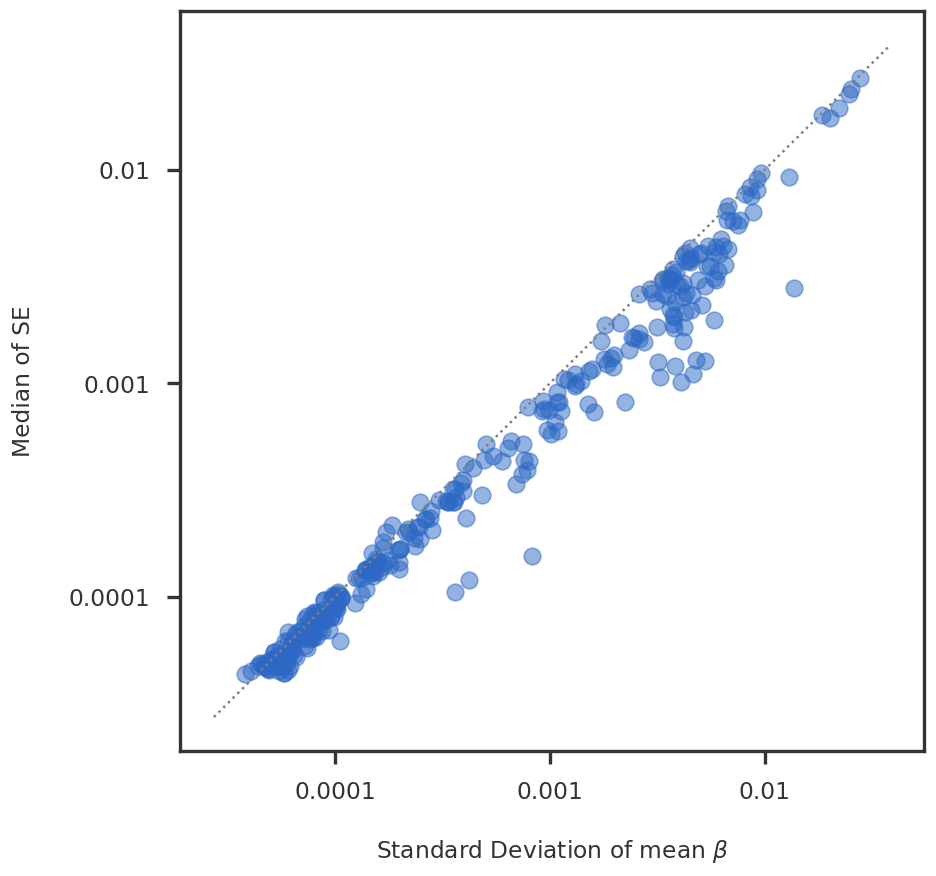

In [70]:
#| label: fig-se-vs-beta-std
#| fig-cap: "Calibration of SE against std of beta"

mean_se  = se_df.median(axis = 0, skipna = True)
mean_se  = pd.DataFrame(mean_se).set_axis(["mean_se"], axis = 1)
beta_std = beta_df.std(axis = 0, skipna = True)
beta_std = pd.DataFrame(beta_std).set_axis(["beta_std"], axis = 1)
error_df = pd.concat([mean_se, beta_std], axis = 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.log10(error_df['beta_std']), np.log10(error_df['mean_se']), alpha = 0.5, s = 100)
mpl_utils.set_xticks(ax1, scale = 'log10', spacing = 'log10')
mpl_utils.set_yticks(ax1, scale = 'log10', spacing = 'log10')
mpl_utils.plot_diag(ax1)

keep_columns = error_df.query("mean_se <= 0.2").index
for pid in error_df.index.to_list():
    if pid not in keep_columns:
        pid_text = f"{pid} / {phenotype_dict[pid]}"
        xval = np.log10(error_df.loc[pid]['beta_std'])
        yval = np.log10(error_df.loc[pid]['mean_se'])
        ax1.annotate(pid_text, (xval, yval))

ax1.set_xlabel(r"Standard Deviation of mean $\beta$")
ax1.set_ylabel(r"Median of SE")
plt.show()

In [71]:
zscore_df.to_pickle("../data/ukbb_zscore_df.pkl")